# 快速上手

### 下载数据

股票列表、股票日K以及宽基指数日K数据。其中宽基指数包括：上证指数、深证成指、创业板指、科创指数、上证50、沪深300、中证500、中证1000

In [1]:
import tradepy
from tradepy.collectors.stock_listing import StocksListingCollector
from tradepy.collectors.stock_day_bars import StockDayBarsCollector
from tradepy.collectors.market_index import BroadBasedIndexCollector
from tradepy.collectors.etf_day_bars import ETFDayBarsCollector
from tradepy.collectors.etf_listing import ETFListingCollector
from tradepy.collectors.adjust_factor import AdjustFactorCollector
from tradepy.depot.stocks import StocksDailyBarsDepot

In [2]:
# 本地数据将保存到此目录。该可在 ~/.tradepy/config.yaml 中修改
tradepy.config.common.database_dir

PosixPath('/Users/dilu/Desktop/Software/Stock/database2')

##### 下载股票列表、复权因子

需要分别获取个股的行业分类和市值数据，耗时需10-20分钟。 如果运行失败，可降低`batch_size`后重试

In [6]:
StocksListingCollector().run(batch_size=25)

[stock_listing] [2023-08-17 22:57:40,439] [INFO]: =============== 开始更新A股上市公司列表 ===============
[stock_listing] [2023-08-17 22:57:51,807] [INFO]: 获取个股的东财行业分类信息                                                                                                                                           
[base] [2023-08-17 22:57:51,809] [INFO]: 
[StocksListingCollector]:
    5042 下载任务
    批大小 = 25
    批数量 = 202
    每批间隔(s) = 3
    临时下载目录: /var/folders/w2/yctzhkrd5wbdg8p7tsf9205w0000gn/T/tmp6ljdlfs9
        
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 202/202 [11:53<00:00,  3.53s/it]
[stock_listing] [2023-08-17 23:09:45,390] [INFO]: 已下载至 /Users/dilu/Desktop/Software/Stock/database2/listing.csv


In [3]:
AdjustFactorCollector().run(batch_size=25)

[adjust_factor] [2023-08-18 15:14:28,294] [INFO]: =============== 开始更新个股复权因子 ===============
[adjust_factor] [2023-08-18 15:14:28,296] [INFO]: 下载中
[base] [2023-08-18 15:14:28,297] [INFO]: 
[AdjustFactorCollector]:
    5042 下载任务
    批大小 = 25
    批数量 = 202
    每批间隔(s) = 2
    临时下载目录: /var/folders/w2/yctzhkrd5wbdg8p7tsf9205w0000gn/T/tmp_as7d1ay
        
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 202/202 [10:56<00:00,  3.25s/it]
[adjust_factor] [2023-08-18 15:25:25,407] [INFO]: 添加头尾时间边界1900, 3000
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5042/5042 [00:15<00:00, 328.15it/s]
[adjust_factor] [2023-08-18 15:25:41,330] [INFO]: 已下载至 /Users/dilu/Desktop/Software/Stock/database2/adjust_factors.csv


,timestamp,hfq_factor
code,,
000001,1900-01-01,1.0000000000000000
000001,1991-04-03,1.0000000000000000
000001,1991-08-19,1.3089531680441000
000001,1992-03-23,1.9756060606061000
000001,1993-05-24,3.7625186877754000
...,...,...
688819,2023-05-19,1.0497824990630000
688819,3000-01-01,NaN
688981,1900-01-01,1.0000000000000000


##### 下载宽基指数日K

In [5]:
BroadBasedIndexCollector().run()

[market_index] [2023-08-17 22:56:52,451] [INFO]: =============== 开始更新宽基指数 ===============
[market_index] [2023-08-17 22:56:54,569] [INFO]: 下载 SSE                                                                                                                                                   
[market_index] [2023-08-17 22:56:55,128] [INFO]: 下载 SZSE
[market_index] [2023-08-17 22:56:55,719] [INFO]: 下载 ChiNext
[market_index] [2023-08-17 22:56:56,167] [INFO]: 下载 STAR
[market_index] [2023-08-17 22:56:56,553] [INFO]: 下载 CSI-300
[market_index] [2023-08-17 22:56:57,089] [INFO]: 下载 CSI-500
[market_index] [2023-08-17 22:56:57,652] [INFO]: 下载 CSI-1000
[market_index] [2023-08-17 22:56:57,975] [INFO]: 下载 SSE-50


##### 下载ETF基金日K

In [3]:
ETFListingCollector().run()
ETFDayBarsCollector().run()

[etf_listing] [2023-08-18 11:44:45,274] [INFO]: =============== 开始更新ETF列表 ===============
[etf_listing] [2023-08-18 11:44:45,635] [INFO]: 已下载至 /Users/dilu/Desktop/Software/Stock/database2/etf-listing.csv
[etf_day_bars] [2023-08-18 11:44:45,636] [INFO]: =============== 开始更新ETF日K数据 ===============
[base] [2023-08-18 11:44:45,642] [INFO]: 检查本地数据是否需要更新
140it [00:00, 252.39it/s]
[base] [2023-08-18 11:44:46,216] [INFO]: 添加新标的, 起始日期 2010-01-01
[base] [2023-08-18 11:44:46,218] [INFO]: 
[ETFDayBarsCollector]:
    791 下载任务
    批大小 = 50
    批数量 = 16
    每批间隔(s) = 5
    临时下载目录: /var/folders/w2/yctzhkrd5wbdg8p7tsf9205w0000gn/T/tmpgptedd41
        
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [01:43<00:00,  6.47s/it]


##### 下载股票日K

* 默认起始日期为 `2010-01-01`，可传入`since_date`以设定起始日期。同样，可调低`batch_size`以防止被数据接口方限流。由于网络不稳定或接口限流，调用偶尔会失败，此时会自动重试（至多三次）。
* 如果本地已下载了股票日K数据，`StockDayBarsCollector`则会先检查是否需要更新，并下载、添加最新的日K数据。

In [3]:
StockDayBarsCollector(since_date='2018-06-01').run(batch_size=35)

##### 查看股票日K数据

部分数据列含义如下: 

- market: 股票所在主板
- turnover: 换手率
- vol: 成交量
- mkt_cap: 总市值（亿）
- mkt_cap_rank: 总市值在本交易日的全市场分位。e.g., "0.5"即"超过全市场50%的股票"
- company: **该交易日**的公司名称，因而可能有不同的值, e.g., ST摘帽

In [3]:
df = StocksDailyBarsDepot.load()
df

5042it [00:26, 188.45it/s]


,timestamp,code,company,market,open,high,low,close,turnover,vol,chg,pct_chg,mkt_cap,mkt_cap_rank
code,,,,,,,,,,,,,,
300268,2018-06-01,300268,*ST佳沃,创业板,18.00,18.00,16.36,16.84,14.90,146647,-0.03,-0.18,22.57,0.07
000301,2018-06-01,000301,东方盛虹,深证主板,6.78,6.87,6.70,6.83,1.17,142473,0.03,0.44,83.21,0.66
000652,2018-06-01,000652,泰达股份,深证主板,3.88,3.90,3.81,3.84,0.47,68830,-0.07,-1.79,56.66,0.51
002516,2018-06-01,002516,旷达科技,中小板,4.04,4.09,4.01,4.03,0.55,52019,0.00,0.00,60.55,0.54
600836,2018-06-01,600836,上海易连,上证主板,4.52,4.62,4.48,4.48,0.31,20530,-0.04,-0.88,29.69,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301072,2023-08-18,301072,中捷精工,创业板,24.07,24.79,24.01,24.38,7.86,26206,0.21,0.87,25.61,0.13
600825,2023-08-18,600825,新华传媒,上证主板,4.51,4.56,4.40,4.41,1.22,127283,-0.12,-2.65,46.08,0.42
301066,2023-08-18,301066,万事利,创业板,16.16,16.33,15.84,15.89,2.57,18517,-0.29,-1.79,29.93,0.20


### 实现策略

实现一个基于10均和30均的金叉买进、死叉卖出的简单策略。但此处我们对短周期均线使用[指数移动平均](https://baike.baidu.com/item/%E6%8C%87%E6%95%B0%E5%B9%B3%E5%9D%87%E6%95%B0%E6%8C%87%E6%A0%87/1847442?fr=ge_ala)，这比简单移动平均更能反应近期价格变化的趋势，且只在股价在120日均线上方时才买入。


In [4]:
import talib
import pandas as pd
from tradepy.strategy.base import BacktestStrategy, BuyOption
from tradepy.decorators import tag

In [5]:
class MovingAverageCrossoverStrategy(BacktestStrategy):

    @tag(notna=True)
    def ma10(self, close: pd.Series) -> pd.Series:
        """
        这是一个技术指标计算函数

        - 输入参数可以为其他指标，称为"上游指标"
        - "上游指标"必须已在回测数据的DataFrame中，或有自己的计算函数
        - 您只需要关注指标的计算函数的实现，TradePy会自动推导指标的依赖关系，保证正确的计算顺序
        - TA-Lib集成了很多常用技术指标的计算方法，推荐使用。
        """
        return talib.EMA(close, 10)

    # notna=True：意为该指标值不能为空，因而回测将从第120日开始进行，请注意预留足够的回测天数
    @tag(notna=True)
    def ma120(self, close):
        return talib.SMA(close, 120)

    @tag(notna=True)
    def ma30(self, close):
        return talib.SMA(close, 30)

    @tag(notna=True)
    def ma10_ref1(self, ma10):
        return ma10.shift(1)

    @tag(notna=True)
    def ma30_ref1(self, ma30):
        return ma30.shift(1)
    
    def should_buy(self,
                   ma120: float, ma10: float, ma30: float,
                   ma10_ref1: float, ma30_ref1: float,
                   close: float) -> BuyOption | None:
        """
        买入信号（必须实现）
        
        - 回测数据DataFrame中的列都可作为输入参数
        - 如果触发买入，则返回 买入价 以及 权重值
        - 制定回测配置时，如果设置了"每日最大开仓数量"或“最低开仓金额”，则有可能触发买入的股票数量大于可买入数量。
          此时，可通过给予不同的权重值，以优先选中预期收益最大的标的。如果希望随机选择标的，可一律返回权重值"1"
        """
        if (ma10 > ma120) and (ma10_ref1 < ma30_ref1) and (ma10 > ma30):
            return close, 1
    
    def should_close(self, ma10, ma30, ma10_ref1, ma30_ref1):
        """
        尾盘平仓信号（可选实现）

        - 除了使用止盈/止损点位平仓，还可根据一定的策略逻辑，判断是否应该在尾盘时提前平仓
        - 返回True / False
        """
        return (ma10_ref1 > ma30_ref1) and (ma10 < ma30)

    def pre_process(self, df: pd.DataFrame) -> pd.DataFrame:
        """
        数据预处理 （可选实现）

        - 输入为原始的回测数据DataFrame
        - 此处可执行任意逻辑，如过滤掉无法交易的板块、加载外部数据（如大盘指数）并添加到DataFrame等等
        """
        return df.query('market != "科创板"').copy()


### 运行回测

In [6]:
from tradepy.core.conf import BacktestConf, StrategyConf, SlippageConf

In [12]:
conf = BacktestConf(
    cash_amount=1e6,  # 初始资金
    broker_commission_rate=0.01,  # 券商费率，此处为万一
    min_broker_commission_fee=0,  # 券商最低佣金，此处为免五
    use_minute_k=False,  # 是否使用分时K线做日内买卖点判断, 需要下载分钟K线
    sl_tf_order='stop loss first',  # 日内价格同时达到止损/止盈价时，先止损还是先止盈
    strategy=StrategyConf(
        stop_loss=4.5,  # 静态止损点位 %
        take_profit=5,  # 静态止盈点位 %
        take_profit_slip=SlippageConf(
            method='max_jump',  # 最大滑点价位
            params=1  # 一跳
        ),
        stop_loss_slip=SlippageConf(
            method='max_pct',  # 最大滑点百分比
            params=0.1  # 0.1%
        ),
        max_position_opens=10,  # 每日最大可开仓数量
        max_position_size=0.25,  # 个股最仓位
        min_trade_amount=8000,  # 开仓最低买入额
    )
)

res, trade_book = MovingAverageCrossoverStrategy.backtest(df, conf)
# res, trade_book = MovingAverageCrossoverStrategy.backtest(res, conf) # 首次计算后，可直接将带指标的回测数据作为输入，再次回测

[base] [2023-08-23 09:15:29,959] [INFO]: >>> 获取待计算因子
[base] [2023-08-23 09:15:29,960] [INFO]: - 待计算: [ma120, ma10, ma30, ma10_ref1, ma30_ref1]
[base] [2023-08-23 09:15:29,960] [INFO]: >>> 计算每支个股的后复权价格以及技术因子


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5042/5042 [01:03<00:00, 79.94it/s]


[backtester] [2023-08-23 09:16:36,552] [INFO]: >>> 重建索引 [timestamp, code]
[backtester] [2023-08-23 09:16:39,889] [INFO]: >>> 交易中 ...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1150/1150 [00:21<00:00, 54.30it/s]


- `backtest`方法返回添加了技术指标后的回测K线数据，以及`TradeBook`实例，记录了交易过程以及每日资产金额变化，该实例也可用于生成结果分析报告。
- 添加技术指标后的数据，可再作为`backtest`的输入数据执行多次回测，此时将不再重新计算指标

In [8]:
trade_book.trade_logs_df[:5]

,action,id,code,vol,price,total_value,chg,pct_chg,total_return,company
timestamp,,,,,,,,,,
2018-11-30,开仓,300261-ceea,300261,5700,44.955358,256245.542145,0.00,0.00,0.000000,雅本化学
2018-11-30,开仓,300498-a63d,300498,6200,39.778625,246627.476875,0.00,0.00,0.000000,温氏股份
2018-11-30,开仓,601872-2096,601872,50900,4.919944,250425.148522,0.00,0.00,0.000000,招商轮船
2018-11-30,开仓,603345-24ab,603345,6400,38.495655,246372.192184,0.00,0.00,0.000000,安井食品
2018-12-03,止盈,300261-ceea,300261,5700,47.800819,272464.670391,2.85,6.33,16220.342818,雅本化学


In [9]:
trade_book.cap_logs_df[:5]

,frozen_cash_amount,market_value,free_cash_amount,capital,pct_chg
timestamp,,,,,
2018-11-27,0,0.00,1000000.00,1000000.00,0.000000
2018-11-28,0,0.00,1000000.00,1000000.00,0.000000
2018-11-29,0,0.00,1000000.00,1000000.00,0.000000
2018-11-30,0,999670.36,229.67,999900.03,-0.000100
2018-12-03,0,1043129.65,787.78,1043917.43,0.044022


In [21]:
res[-5:].round(2)

timestamp    code company market   open   high    low  \
timestamp  code                                                             
2023-08-18 605580  2023-08-18  605580    恒盛能源   上证主板  17.89  18.33  17.85   
           605588  2023-08-18  605588    冠石科技   上证主板  38.64  39.19  38.07   
           605589  2023-08-18  605589    圣泉集团   上证主板  21.91  22.09  21.64   
           605598  2023-08-18  605598    上海港湾   上证主板  44.57  44.99  43.44   
           605599  2023-08-18  605599    菜百股份   上证主板  14.92  15.12  14.79   

                   close  turnover    vol   chg  pct_chg  mkt_cap  \
timestamp  code                                                     
2023-08-18 605580  17.92      4.45  31827 -0.02    -0.08    33.10   
           605588  38.08      3.88   8968 -0.43    -1.12    27.65   
           605589  21.65      0.75  45990 -0.26    -1.17   165.03   
           605598  43.79      1.82  13445 -0.77    -1.74    76.55   
           605599  14.82      0.59  34532 -0.08    -0.50   107.33   

                   mkt_cap_rank  orig_open   ma10   ma30  ma120  ma10_ref1  \
timestamp  code                                                              
2023-08-18 605580          0.25      11.80  18.01  18.94  17.77      18.03   
           605588          0.16      38.39  38.99  41.64  40.19      39.20   
           605589          0.82      21.33  22.53  24.41  21.78      22.72   
           605598          0.63      31.70  44.51  46.71  41.21      44.67   
           605599          0.73      13.89  14.77  14.92  12.64      14.76   

                   ma30_ref1  
timestamp  code               
2023-08-18 605580      19.09  
           605588      41.91  
           605589      24.50  
           605598      47.03  
           605599      14.90

### 分析结果

- 与上证指数对比，可直观地看到该策略获得了超额收益（4年半间大约80%回报），但收益曲线波动较大
- 使用`BasicEvaluator.basic_report`可查看主要指标。
- 使用`BasicEvaluator.html_report`可下载详细的结果报告，该报告由[quantstats](https://github.com/ranaroussi/quantstats)生成，详情请查阅其文档。


In [10]:
from tradepy.backtest import BasicEvaluator
from tradepy.analysis.plots import plot_capital_curve

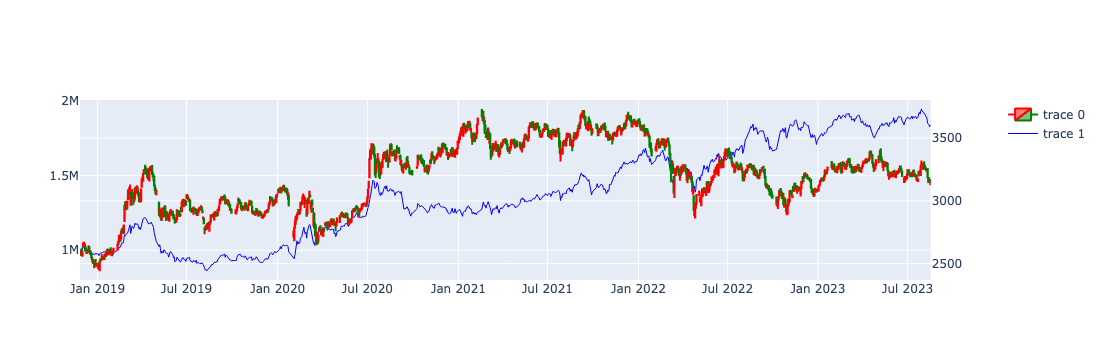

In [13]:
plot_capital_curve(trade_book)

In [15]:
e = BasicEvaluator(trade_book)
e.basic_report()


开仓 = 9884
止损 = 4297
止盈 = 4673
提前平仓 = 881
胜率 47.58%
最大回撤 = -29.27%
总收益 = 182.19%
平均开仓收益: 0.11% (标准差: 3.42%)
夏普比率: 0.82


In [1]:
e.html_report()